In [1]:
from collections import defaultdict

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


Bad key "text.kerning_factor" on line 4 in
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [3]:
cp = pd.read_csv("../../CenterMeanOVLP.csv") 
cp = cp.loc[:,cp.apply(pd.Series.nunique) != 1]
cp


,Unnamed: 0,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,Cells_AreaShape_MaxFeretDiameter,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,smiles_r
0,0,-53.322266,15.138672,-7.832031,0.020546,0.011831,-0.005042,0.006361,1.567715,1.506277,...,0.007785,0.019312,0.020843,-0.064662,-0.072990,-0.084042,0.215716,0.155296,0.176099,Brc1c(NC2=NCCN2)ccc2nccnc12
1,1,41.678711,1.973633,-8.867188,0.008705,0.008857,-0.001514,-0.009787,0.946463,1.437743,...,-0.018887,-0.003844,-0.019000,0.007360,0.025757,0.027188,0.088701,0.052283,0.062916,c1ccc(C(O[C@@H]2CCCN(CCc3ccc4c(c3)OCO4)C2)c2cc...
2,2,418.492188,6.976562,7.766602,0.023997,0.005404,-0.005869,-0.024194,6.252890,6.685650,...,-0.105881,0.011543,0.004370,-0.208441,-0.081369,-0.084740,-0.095445,-0.015152,-0.045636,c1cnc(N2CCN(Cc3ccc4c(c3)OCO4)CC2)nc1
3,3,-10.445312,0.101562,-0.045898,-0.003597,0.000294,0.002599,-0.001359,-0.473211,-0.001053,...,-0.024427,-0.053814,-0.040165,-0.066490,-0.036203,-0.040287,0.040549,0.026975,0.027425,c1ccc(C2CC2)c(OCC2=NCCN2)c1
4,4,48.655273,1.666992,2.486328,0.018529,0.011256,-0.002420,0.004862,1.776159,1.611745,...,0.116695,0.172022,0.164453,-0.012553,0.000800,-0.010659,0.088510,0.083851,0.076598,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,-133.445312,-2.585938,-4.170898,-0.006187,-0.002578,-0.001801,-0.007760,-2.365016,-2.547309,...,-0.069310,-0.098329,-0.084651,-0.048275,-0.071216,-0.062632,-0.079043,-0.088448,-0.085335,c1ccc2c(c1)[nH]c1cnccc12
642,642,-26.469727,-0.145508,-0.763672,-0.006640,-0.000166,0.001977,-0.003229,-0.770855,-0.478971,...,-0.040332,-0.035610,-0.022689,-0.003744,-0.012261,-0.003150,-0.006708,-0.009239,-0.004748,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34
643,643,215.939732,2.107143,-7.992188,0.014079,0.009538,-0.005964,0.005382,3.785917,4.371880,...,-0.084987,-0.049924,-0.072038,-0.012332,0.017893,0.006418,0.005525,0.026849,0.029421,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1
644,644,1810.023438,4.320312,-1.496094,0.085425,0.025699,-0.030275,-0.063700,27.234844,31.637251,...,0.243208,0.345452,0.292939,0.108634,0.165323,0.152386,-0.089590,-0.020275,-0.033736,c1cnc2c(c1)ccc1cccnc12


In [4]:
toxcast = pd.read_csv("../../toxcast_Overlap.csv") 
toxcast

,Unnamed: 0,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up,smiles_r
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCc1ccccc1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C=CCN1CCc2nc(N)sc2CC1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1cc(-c2ccc(=O)[nH]n2)ccc1OC(F)F
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC1(C)CCC(C)(C)c2cc(C(=O)Nc3ccc(C(=O)O)cc3)ccc21
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC(C)(C)NC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4NC(...
642,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O=C(O)c1ccc2[nH]cc(CCCCN3CC=C(c4ccccc4)CC3)c2c1
643,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clc1cccc(SC2CCNCC2)n1
644,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCN(CC)CCOc1ccc(Cc2ccccc2)cc1


In [5]:
tox_list=['BSK_hDFCGF_Proliferation_down',
             'APR_HepG2_CellLoss_72h_dn',
             'BSK_3C_Proliferation_down',
             'BSK_SAg_Proliferation_down',
             'BSK_3C_SRB_down',
             'BSK_3C_Vis_down',
             'APR_HepG2_CellLoss_24h_dn',
             'BSK_LPS_SRB_down',
             'BSK_CASM3C_Proliferation_down',
             'BSK_SAg_SRB_down',
             'BSK_4H_SRB_down',
             'ACEA_T47D_80hr_Negative'
         ]

In [6]:
our_data=toxcast.reindex(columns=tox_list)

In [7]:
our_data

,BSK_hDFCGF_Proliferation_down,APR_HepG2_CellLoss_72h_dn,BSK_3C_Proliferation_down,BSK_SAg_Proliferation_down,BSK_3C_SRB_down,BSK_3C_Vis_down,APR_HepG2_CellLoss_24h_dn,BSK_LPS_SRB_down,BSK_CASM3C_Proliferation_down,BSK_SAg_SRB_down,BSK_4H_SRB_down,ACEA_T47D_80hr_Negative
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import cDataStructs
import seaborn as sns
import matplotlib.pyplot as plt
import rdkit.Chem.Descriptors
from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint
from rdkit.Chem.rdMolDescriptors import *
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Avalon.pyAvalonTools import GetAvalonFP #GetAvalonCountFP  #int vector version
from rdkit.Chem.AllChem import  GetMorganFingerprintAsBitVect, GetErGFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import rdkit.DataStructs.cDataStructs
from rdkit.Avalon.pyAvalonTools import GetAvalonFP

def ErGFingerprint(s):
    x = Chem.MolFromSmiles(s)
    return (AllChem.GetErGFingerprint(x))



In [9]:
from sklearn.feature_selection import VarianceThreshold



In [10]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [11]:
from sklearn.feature_selection import VarianceThreshold
from numpy  import array



In [12]:
from scipy import stats
from scipy.stats import ks_2samp 
#Calculates a point biserial correlation coefficient and the associated p-value.

    


In [13]:
from sklearn.preprocessing import LabelBinarizer # one hot encoding
from sklearn.preprocessing import PolynomialFeatures # add polynomial features
from sklearn.linear_model import LogisticRegression
import seaborn as sns
 #Grid Search with Cross Validation RF
from sklearn import metrics


from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search

In [14]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold

In [15]:
def GetExactMolWt(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.ExactMolWt (mol))
def GetCalcTPSA(s):
    mol = Chem.MolFromSmiles(s)
    return (Chem.rdMolDescriptors.CalcTPSA(mol))
def GetNumRotatableBonds(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumRotatableBonds (mol))
def GetNumHDonors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHDonors(mol))
def GetNumHAcceptors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHAcceptors(mol) )
def GetMolLogP(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.MolLogP(mol))

Start
1.0    56
0.0    50
Name: BSK_hDFCGF_Proliferation_down, dtype: int64


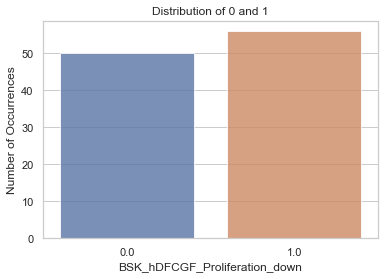

Total Compounds in Assay:  106
106
106
Total Selected CP features:  96
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   27.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   49.8s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  5.3min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 6]
 [5 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.44      0.40      0.42        10
         1.0       0.54      0.58      0.56        12

    accuracy                           0.50        22
   macro avg       0.49      0.49      0.49        22
weighted avg       0.50      0.50      0.50        22

Total Selected CP features:  101
Total Selected train:  85


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 1]
 [6 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.90      0.72        10
         1.0       0.83      0.45      0.59        11

    accuracy                           0.67        21
   macro avg       0.72      0.68      0.65        21
weighted avg       0.72      0.67      0.65        21

Total Selected CP features:  138
Total Selected train:  85


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.2s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 3]
 [3 8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.73      0.73      0.73        11

    accuracy                           0.71        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.71      0.71      0.71        21

Total Selected CP features:  106
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 2]
 [7 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.53      0.80      0.64        10
         1.0       0.67      0.36      0.47        11

    accuracy                           0.57        21
   macro avg       0.60      0.58      0.56        21
weighted avg       0.60      0.57      0.55        21

Total Selected CP features:  26
Total Selected train:  8

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 6]
 [3 8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.40      0.47        10
         1.0       0.57      0.73      0.64        11

    accuracy                           0.57        21
   macro avg       0.57      0.56      0.56        21
weighted avg       0.57      0.57      0.56        21



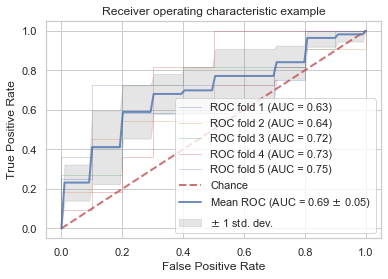

Mean of Each fold


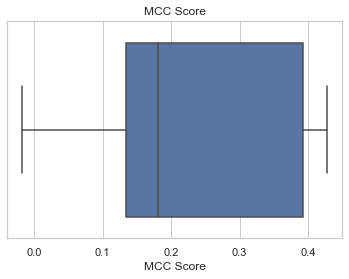

Matthews_corrcoef all:  [-0.016878989451394443, 0.3919647479510927, 0.42727272727272725, 0.18090680674665818, 0.13483997249264842]
Matthews_corrcoef mean:  0.22362105300234641


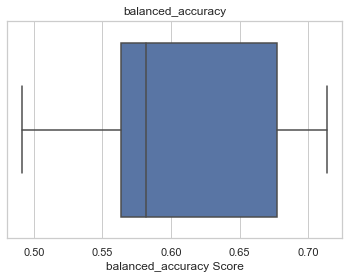

balanced_accuracy all:  [0.4916666666666667, 0.6772727272727272, 0.7136363636363636, 0.5818181818181818, 0.5636363636363637]
balanced_accuracy mean:  0.6056060606060607


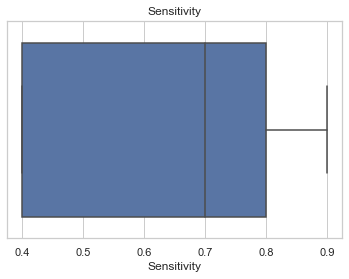

Sensitivity all:  [0.4, 0.9, 0.7, 0.8, 0.4]
Sensitivity mean:  0.6399999999999999


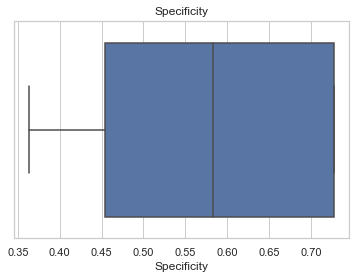

Specificity all:  [0.5833333333333334, 0.45454545454545453, 0.7272727272727273, 0.36363636363636365, 0.7272727272727273]
Specificity mean:  0.5712121212121213
One Combined Confusion Matrix
conf_matrix: 
  [[32 18]
 [24 32]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.64      0.60        50
         1.0       0.64      0.57      0.60        56

    accuracy                           0.60       106
   macro avg       0.61      0.61      0.60       106
weighted avg       0.61      0.60      0.60       106

matthews_corrcoef
0.21142857142857144
balanced_accuracy_score
0.6057142857142856
Sensitivity
0.64
Specificity
0.5714285714285714
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6814285714285715


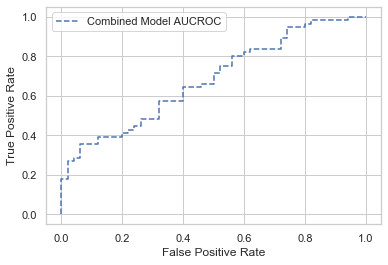

Start
1.0    45
0.0    43
Name: APR_HepG2_CellLoss_72h_dn, dtype: int64


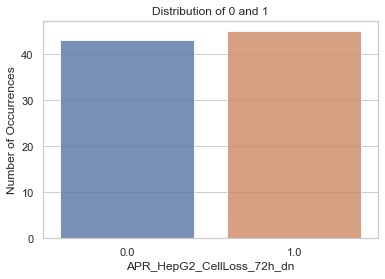

Total Compounds in Assay:  88
88
88
Total Selected CP features:  36
Total Selected train:  70
Total Selected test:  18
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 4]
 [2 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.56      0.63         9
         1.0       0.64      0.78      0.70         9

    accuracy                           0.67        18
   macro avg       0.68      0.67      0.66        18
weighted avg       0.68      0.67      0.66        18

Total Selected CP features:  107
Total Selected train:  70
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   14.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   40.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 1]
 [5 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.89      0.73         9
         1.0       0.80      0.44      0.57         9

    accuracy                           0.67        18
   macro avg       0.71      0.67      0.65        18
weighted avg       0.71      0.67      0.65        18

Total Selected CP features:  135
Total Selected train:  70


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 0]
 [7 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.56      1.00      0.72         9
         1.0       1.00      0.22      0.36         9

    accuracy                           0.61        18
   macro avg       0.78      0.61      0.54        18
weighted avg       0.78      0.61      0.54        18

Total Selected CP features:  69
Total Selected train:  71
To

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   28.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 2]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.75      0.71         8
         1.0       0.75      0.67      0.71         9

    accuracy                           0.71        17
   macro avg       0.71      0.71      0.71        17
weighted avg       0.71      0.71      0.71        17

Total Selected CP features:  102
Total Selected train:  7

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   34.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 2]
 [6 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.75      0.60         8
         1.0       0.60      0.33      0.43         9

    accuracy                           0.53        17
   macro avg       0.55      0.54      0.51        17
weighted avg       0.55      0.53      0.51        17



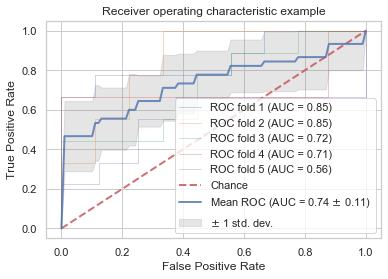

Mean of Each fold


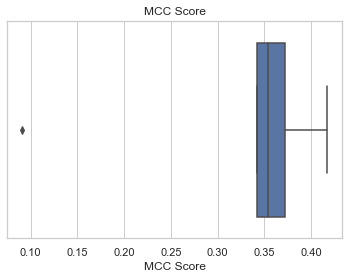

Matthews_corrcoef all:  [0.34188172937891387, 0.3721042037676254, 0.3535533905932738, 0.4166666666666667, 0.09128709291752769]
Matthews_corrcoef mean:  0.3150986166648015


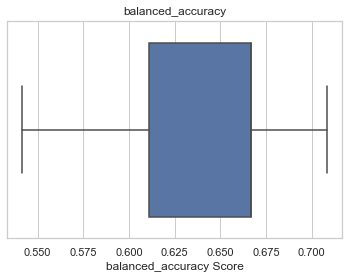

balanced_accuracy all:  [0.6666666666666667, 0.6666666666666666, 0.6111111111111112, 0.7083333333333333, 0.5416666666666666]
balanced_accuracy mean:  0.6388888888888888


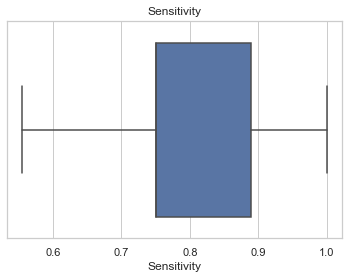

Sensitivity all:  [0.5555555555555556, 0.8888888888888888, 1.0, 0.75, 0.75]
Sensitivity mean:  0.788888888888889


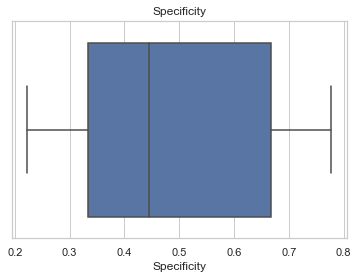

Specificity all:  [0.7777777777777778, 0.4444444444444444, 0.2222222222222222, 0.6666666666666666, 0.3333333333333333]
Specificity mean:  0.48888888888888893
One Combined Confusion Matrix
conf_matrix: 
  [[34  9]
 [23 22]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.79      0.68        43
         1.0       0.71      0.49      0.58        45

    accuracy                           0.64        88
   macro avg       0.65      0.64      0.63        88
weighted avg       0.65      0.64      0.63        88

matthews_corrcoef
0.29257587037564015
balanced_accuracy_score
0.6397932816537467
Sensitivity
0.7906976744186046
Specificity
0.4888888888888889
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7064599483204135


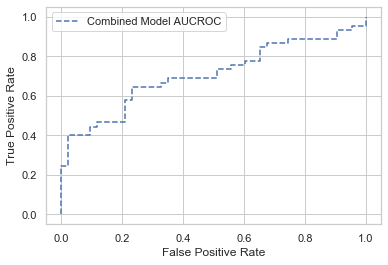

Start
1.0    54
0.0    52
Name: BSK_3C_Proliferation_down, dtype: int64


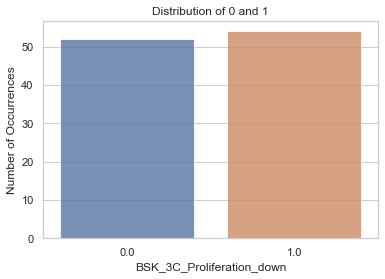

Total Compounds in Assay:  106
106
106
Total Selected CP features:  76
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  0]
 [ 7  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.61      1.00      0.76        11
         1.0       1.00      0.36      0.53        11

    accuracy                           0.68        22
   macro avg       0.81      0.68      0.65        22
weighted avg       0.81      0.68      0.65        22

Total Selected CP features:  43
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  0]
 [ 3  8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.77      1.00      0.87        10
         1.0       1.00      0.73      0.84        11

    accuracy                           0.86        21
   macro avg       0.88      0.86      0.86        21
weighted avg       0.89      0.86      0.86        21

Total Selected CP features:  120
Total Selected train: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 5]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.56      0.50      0.53        10
         1.0       0.58      0.64      0.61        11

    accuracy                           0.57        21
   macro avg       0.57      0.57      0.57        21
weighted avg       0.57      0.57      0.57        21

Total Selected CP features:  113
Total Selected train:  85
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 2]
 [2 9]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        10
         1.0       0.82      0.82      0.82        11

    accuracy                           0.81        21
   macro avg       0.81      0.81      0.81        21
weighted avg       0.81      0.81      0.81        21

Total Selected CP features:  54
Total Selected train:  85
To

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 4]
 [2 8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      0.64      0.70        11
         1.0       0.67      0.80      0.73        10

    accuracy                           0.71        21
   macro avg       0.72      0.72      0.71        21
weighted avg       0.72      0.71      0.71        21



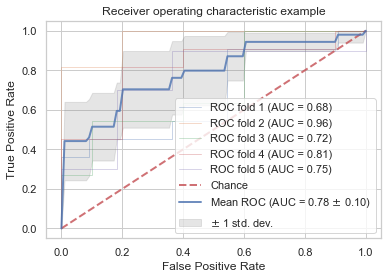

Mean of Each fold


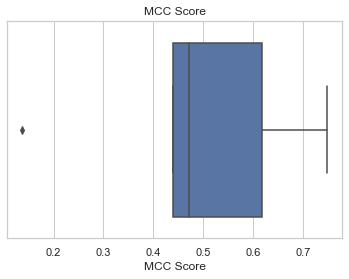

Matthews_corrcoef all:  [0.4714045207910317, 0.7479575920067657, 0.13762047064079508, 0.6181818181818182, 0.4403855060505442]
Matthews_corrcoef mean:  0.48310998153419094


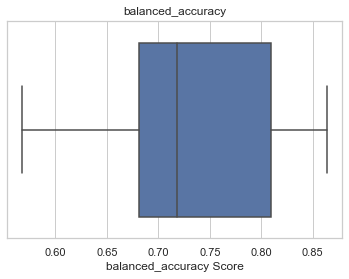

balanced_accuracy all:  [0.6818181818181819, 0.8636363636363636, 0.5681818181818181, 0.8090909090909091, 0.7181818181818183]
balanced_accuracy mean:  0.7281818181818182


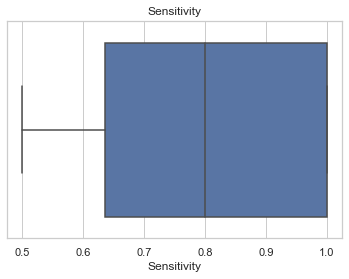

Sensitivity all:  [1.0, 1.0, 0.5, 0.8, 0.6363636363636364]
Sensitivity mean:  0.7872727272727272


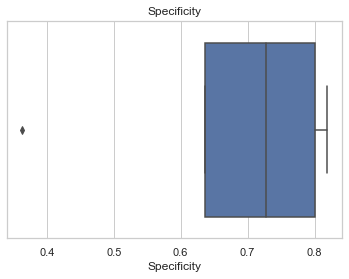

Specificity all:  [0.36363636363636365, 0.7272727272727273, 0.6363636363636364, 0.8181818181818182, 0.8]
Specificity mean:  0.6690909090909092
One Combined Confusion Matrix
conf_matrix: 
  [[41 11]
 [18 36]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.79      0.74        52
         1.0       0.77      0.67      0.71        54

    accuracy                           0.73       106
   macro avg       0.73      0.73      0.73       106
weighted avg       0.73      0.73      0.73       106

matthews_corrcoef
0.45799144666637853
balanced_accuracy_score
0.7275641025641025
Sensitivity
0.7884615384615384
Specificity
0.6666666666666666
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7863247863247863


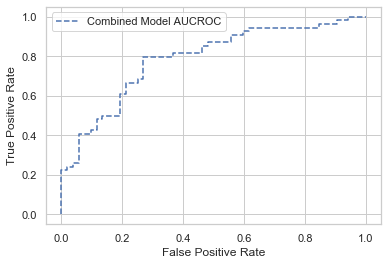

Start
0.0    58
1.0    48
Name: BSK_SAg_Proliferation_down, dtype: int64


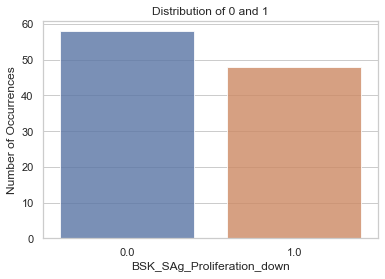

Total Compounds in Assay:  106
106
106
Total Selected CP features:  186
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  2]
 [ 7  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.59      0.83      0.69        12
         1.0       0.60      0.30      0.40        10

    accuracy                           0.59        22
   macro avg       0.59      0.57      0.54        22
weighted avg       0.59      0.59      0.56        22

Total Selected CP features:  117
Total Selected train: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   40.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 5]
 [3 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.55      0.60        11
         1.0       0.58      0.70      0.64        10

    accuracy                           0.62        21
   macro avg       0.62      0.62      0.62        21
weighted avg       0.63      0.62      0.62        21

Total Selected CP features:  186
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 3]
 [6 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.73      0.64        11
         1.0       0.57      0.40      0.47        10

    accuracy                           0.57        21
   macro avg       0.57      0.56      0.56        21
weighted avg       0.57      0.57      0.56        21

Total Selected CP features:  240
Total Selected train:  85
Tot

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [5 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.67      0.64        12
         1.0       0.50      0.44      0.47         9

    accuracy                           0.57        21
   macro avg       0.56      0.56      0.56        21
weighted avg       0.57      0.57      0.57        21

Total Selected CP features:  105
Total Selected train:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  1]
 [ 5  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.92      0.79        12
         1.0       0.80      0.44      0.57         9

    accuracy                           0.71        21
   macro avg       0.74      0.68      0.68        21
weighted avg       0.74      0.71      0.69        21



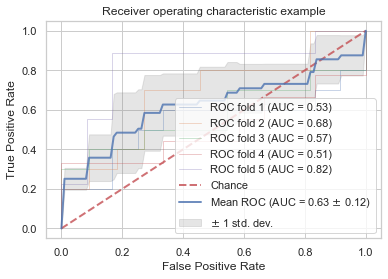

Mean of Each fold


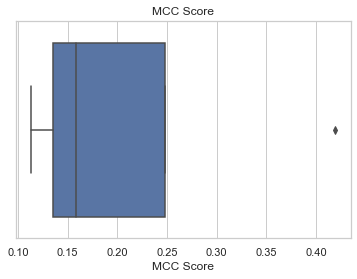

Matthews_corrcoef all:  [0.1584236068762679, 0.24771684715343112, 0.13483997249264842, 0.11322770341445958, 0.4195731958391368]
Matthews_corrcoef mean:  0.21475626515518878


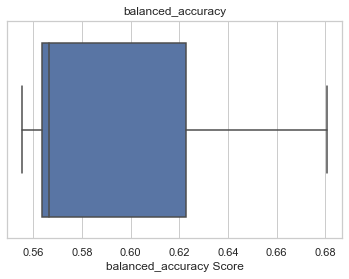

balanced_accuracy all:  [0.5666666666666667, 0.6227272727272727, 0.5636363636363637, 0.5555555555555556, 0.6805555555555556]
balanced_accuracy mean:  0.5978282828282829


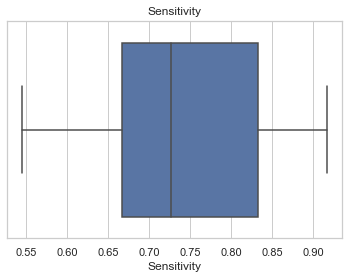

Sensitivity all:  [0.8333333333333334, 0.5454545454545454, 0.7272727272727273, 0.6666666666666666, 0.9166666666666666]
Sensitivity mean:  0.7378787878787879


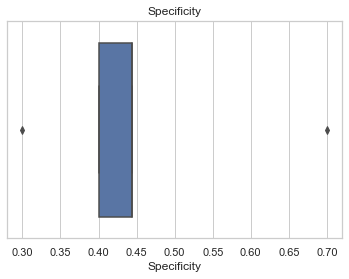

Specificity all:  [0.3, 0.7, 0.4, 0.4444444444444444, 0.4444444444444444]
Specificity mean:  0.45777777777777773
One Combined Confusion Matrix
conf_matrix: 
  [[43 15]
 [26 22]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.74      0.68        58
         1.0       0.59      0.46      0.52        48

    accuracy                           0.61       106
   macro avg       0.61      0.60      0.60       106
weighted avg       0.61      0.61      0.60       106

matthews_corrcoef
0.20855219671916086
balanced_accuracy_score
0.5998563218390804
Sensitivity
0.7413793103448276
Specificity
0.4583333333333333
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6314655172413792


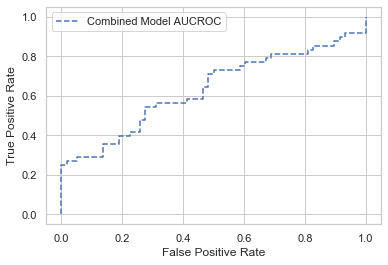

Start
0.0    61
1.0    45
Name: BSK_3C_SRB_down, dtype: int64


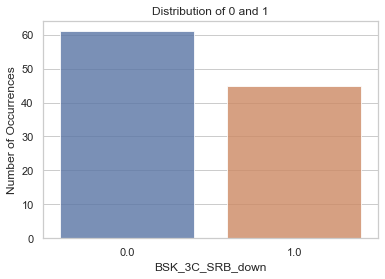

Total Compounds in Assay:  106
106
106
Total Selected CP features:  15
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  3]
 [ 5  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.77      0.71        13
         1.0       0.57      0.44      0.50         9

    accuracy                           0.64        22
   macro avg       0.62      0.61      0.61        22
weighted avg       0.63      0.64      0.63        22

Total Selected CP features:  70
Total Selected train:  85


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 3]
 [5 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.75      0.69        12
         1.0       0.57      0.44      0.50         9

    accuracy                           0.62        21
   macro avg       0.61      0.60      0.60        21
weighted avg       0.61      0.62      0.61        21

Total Selected CP features:  32
Total Selected train:  85
Total

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.4min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  1]
 [ 5  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.92      0.79        12
         1.0       0.80      0.44      0.57         9

    accuracy                           0.71        21
   macro avg       0.74      0.68      0.68        21
weighted avg       0.74      0.71      0.69        21

Total Selected CP features:  83
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [6 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.67      0.62        12
         1.0       0.43      0.33      0.38         9

    accuracy                           0.52        21
   macro avg       0.50      0.50      0.50        21
weighted avg       0.51      0.52      0.51        21

Total Selected CP features:  30
Total Selected train:  85
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [5 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.67      0.64        12
         1.0       0.50      0.44      0.47         9

    accuracy                           0.57        21
   macro avg       0.56      0.56      0.56        21
weighted avg       0.57      0.57      0.57        21



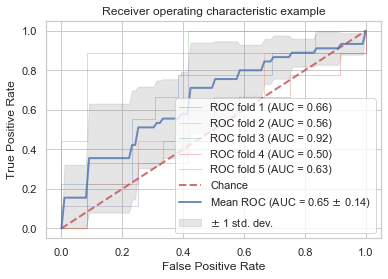

Mean of Each fold


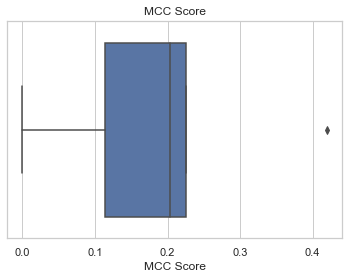

Matthews_corrcoef all:  [0.2255549841503195, 0.2041241452319315, 0.4195731958391368, 0.0, 0.11322770341445958]
Matthews_corrcoef mean:  0.19249600572716946


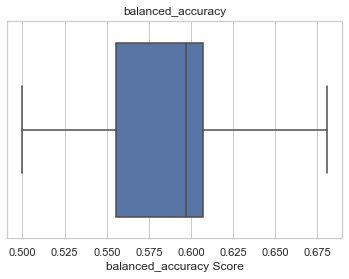

balanced_accuracy all:  [0.6068376068376069, 0.5972222222222222, 0.6805555555555556, 0.5, 0.5555555555555556]
balanced_accuracy mean:  0.588034188034188


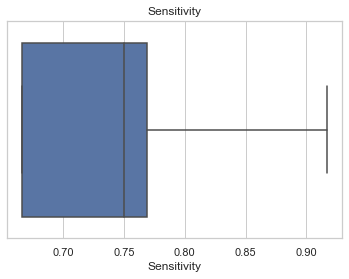

Sensitivity all:  [0.7692307692307693, 0.75, 0.9166666666666666, 0.6666666666666666, 0.6666666666666666]
Sensitivity mean:  0.7538461538461537


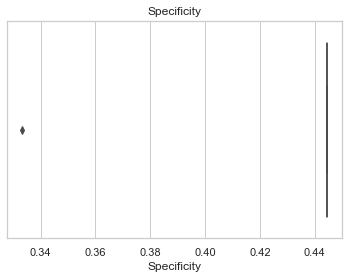

Specificity all:  [0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.3333333333333333, 0.4444444444444444]
Specificity mean:  0.42222222222222217
One Combined Confusion Matrix
conf_matrix: 
  [[46 15]
 [26 19]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.75      0.69        61
         1.0       0.56      0.42      0.48        45

    accuracy                           0.61       106
   macro avg       0.60      0.59      0.59       106
weighted avg       0.60      0.61      0.60       106

matthews_corrcoef
0.18671038759796488
balanced_accuracy_score
0.58816029143898
Sensitivity
0.7540983606557377
Specificity
0.4222222222222222
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6284153005464481


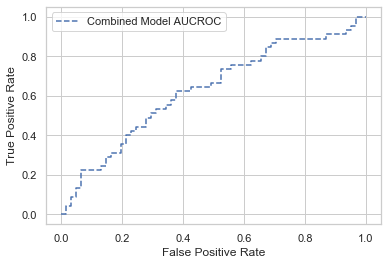

Start
0.0    65
1.0    41
Name: BSK_3C_Vis_down, dtype: int64


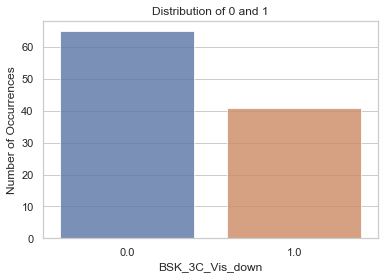

Total Compounds in Assay:  106
106
106
Total Selected CP features:  64
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  2]
 [ 2  7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        13
         1.0       0.78      0.78      0.78         9

    accuracy                           0.82        22
   macro avg       0.81      0.81      0.81        22
weighted avg       0.82      0.82      0.82        22

Total Selected CP features:  267
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   40.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  2]
 [ 6  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.85      0.73        13
         1.0       0.50      0.25      0.33         8

    accuracy                           0.62        21
   macro avg       0.57      0.55      0.53        21
weighted avg       0.59      0.62      0.58        21

Total Selected CP features:  80
Total Selected train:  85
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 3  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.92      0.86        13
         1.0       0.83      0.62      0.71         8

    accuracy                           0.81        21
   macro avg       0.82      0.77      0.79        21
weighted avg       0.81      0.81      0.80        21

Total Selected CP features:  271
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 6  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.92      0.77        13
         1.0       0.67      0.25      0.36         8

    accuracy                           0.67        21
   macro avg       0.67      0.59      0.57        21
weighted avg       0.67      0.67      0.62        21

Total Selected CP features:  252
Total Selected train:  85

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 4]
 [6 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.69      0.64        13
         1.0       0.33      0.25      0.29         8

    accuracy                           0.52        21
   macro avg       0.47      0.47      0.46        21
weighted avg       0.50      0.52      0.51        21



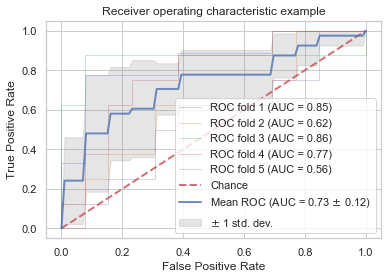

Mean of Each fold


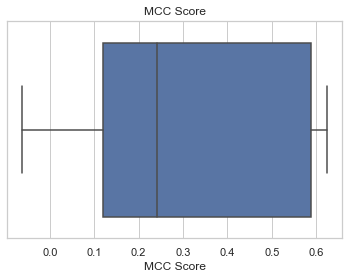

Matthews_corrcoef all:  [0.6239316239316239, 0.11891287353862351, 0.5891649892987402, 0.2401922307076307, -0.062017367294604234]
Matthews_corrcoef mean:  0.3020368700364028


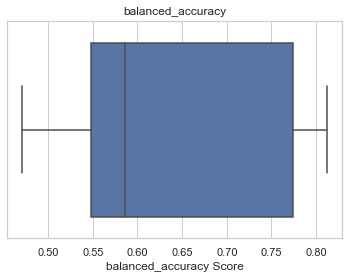

balanced_accuracy all:  [0.811965811965812, 0.5480769230769231, 0.7740384615384616, 0.5865384615384616, 0.47115384615384615]
balanced_accuracy mean:  0.6383547008547009


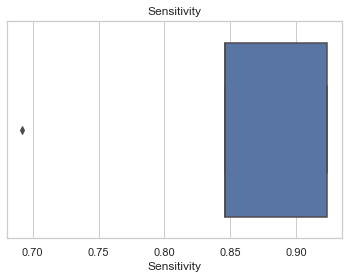

Sensitivity all:  [0.8461538461538461, 0.8461538461538461, 0.9230769230769231, 0.9230769230769231, 0.6923076923076923]
Sensitivity mean:  0.8461538461538461


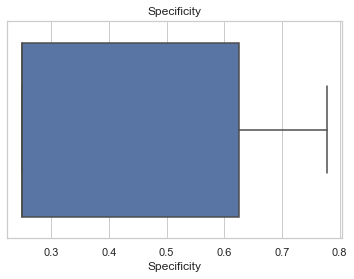

Specificity all:  [0.7777777777777778, 0.25, 0.625, 0.25, 0.25]
Specificity mean:  0.4305555555555555
One Combined Confusion Matrix
conf_matrix: 
  [[55 10]
 [23 18]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.85      0.77        65
         1.0       0.64      0.44      0.52        41

    accuracy                           0.69       106
   macro avg       0.67      0.64      0.65       106
weighted avg       0.68      0.69      0.67       106

matthews_corrcoef
0.31502039272199245
balanced_accuracy_score
0.6425891181988743
Sensitivity
0.8461538461538461
Specificity
0.43902439024390244
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7080675422138838


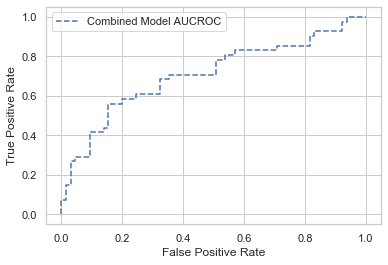

Start
0.0    55
1.0    33
Name: APR_HepG2_CellLoss_24h_dn, dtype: int64


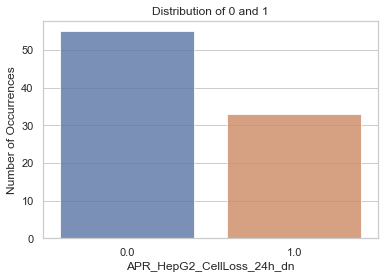

Total Compounds in Assay:  88
88
88
Total Selected CP features:  122
Total Selected train:  70
Total Selected test:  18
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  0]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      1.00      0.85        11
         1.0       1.00      0.43      0.60         7

    accuracy                           0.78        18
   macro avg       0.87      0.71      0.72        18
weighted avg       0.84      0.78      0.75        18

Total Selected CP features:  121
Total Selected train:  70

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  0]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      1.00      0.85        11
         1.0       1.00      0.43      0.60         7

    accuracy                           0.78        18
   macro avg       0.87      0.71      0.72        18
weighted avg       0.84      0.78      0.75        18

Total Selected CP features:  329
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  1]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.91      0.77        11
         1.0       0.67      0.29      0.40         7

    accuracy                           0.67        18
   macro avg       0.67      0.60      0.58        18
weighted avg       0.67      0.67      0.63        18

Total Selected CP features:  258
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  0]
 [ 4  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      1.00      0.85        11
         1.0       1.00      0.33      0.50         6

    accuracy                           0.76        17
   macro avg       0.87      0.67      0.67        17
weighted avg       0.83      0.76      0.72        17

Total Selected CP features:  181
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 4]
 [3 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.70      0.64      0.67        11
         1.0       0.43      0.50      0.46         6

    accuracy                           0.59        17
   macro avg       0.56      0.57      0.56        17
weighted avg       0.60      0.59      0.59        17



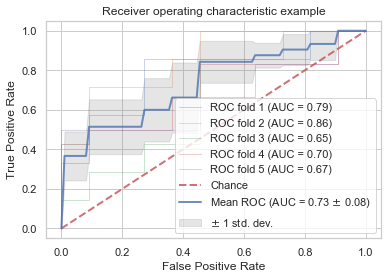

Mean of Each fold


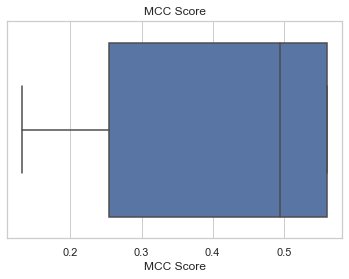

Matthews_corrcoef all:  [0.5606119105813882, 0.5606119105813882, 0.2548235957188128, 0.4944132324730442, 0.13241022442571243]
Matthews_corrcoef mean:  0.4005741747560691


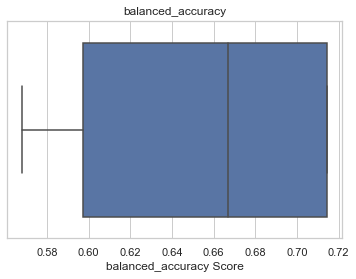

balanced_accuracy all:  [0.7142857142857143, 0.7142857142857143, 0.5974025974025974, 0.6666666666666666, 0.5681818181818181]
balanced_accuracy mean:  0.6521645021645022


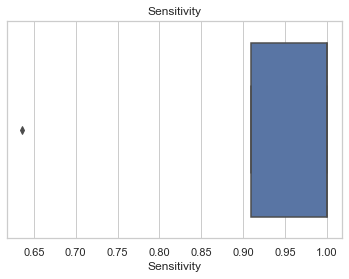

Sensitivity all:  [1.0, 1.0, 0.9090909090909091, 1.0, 0.6363636363636364]
Sensitivity mean:  0.9090909090909092


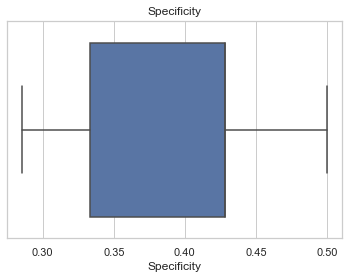

Specificity all:  [0.42857142857142855, 0.42857142857142855, 0.2857142857142857, 0.3333333333333333, 0.5]
Specificity mean:  0.3952380952380952
One Combined Confusion Matrix
conf_matrix: 
  [[50  5]
 [20 13]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.91      0.80        55
         1.0       0.72      0.39      0.51        33

    accuracy                           0.72        88
   macro avg       0.72      0.65      0.65        88
weighted avg       0.72      0.72      0.69        88

matthews_corrcoef
0.363696483726654
balanced_accuracy_score
0.6515151515151515
Sensitivity
0.9090909090909091
Specificity
0.3939393939393939
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7239669421487603


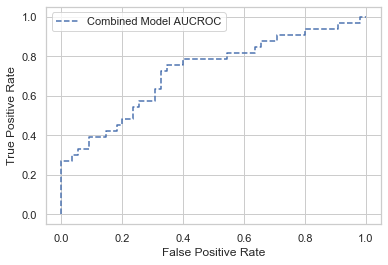

Start
0.0    67
1.0    39
Name: BSK_LPS_SRB_down, dtype: int64


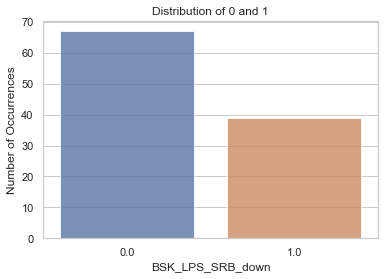

Total Compounds in Assay:  106
106
106
Total Selected CP features:  92
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 2  6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.85      0.79      0.81        14
         1.0       0.67      0.75      0.71         8

    accuracy                           0.77        22
   macro avg       0.76      0.77      0.76        22
weighted avg       0.78      0.77      0.78        22

Total Selected CP features:  163
Total Selected train

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 6]
 [4 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.54      0.58        13
         1.0       0.40      0.50      0.44         8

    accuracy                           0.52        21
   macro avg       0.52      0.52      0.51        21
weighted avg       0.55      0.52      0.53        21

Total Selected CP features:  156
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 6  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.92      0.77        13
         1.0       0.67      0.25      0.36         8

    accuracy                           0.67        21
   macro avg       0.67      0.59      0.57        21
weighted avg       0.67      0.67      0.62        21

Total Selected CP features:  75
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  0]
 [ 5  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        13
         1.0       1.00      0.38      0.55         8

    accuracy                           0.76        21
   macro avg       0.86      0.69      0.69        21
weighted avg       0.83      0.76      0.73        21

Total Selected CP features:  87
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 2  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.85      0.79      0.81        14
         1.0       0.62      0.71      0.67         7

    accuracy                           0.76        21
   macro avg       0.74      0.75      0.74        21
weighted avg       0.77      0.76      0.77        21



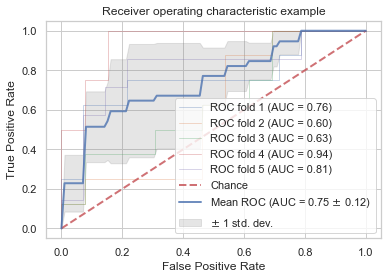

Mean of Each fold


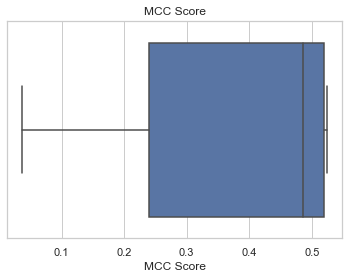

Matthews_corrcoef all:  [0.5241424183609591, 0.03739787960033829, 0.2401922307076307, 0.5204164998665333, 0.4853626716970755]
Matthews_corrcoef mean:  0.36150234004650733


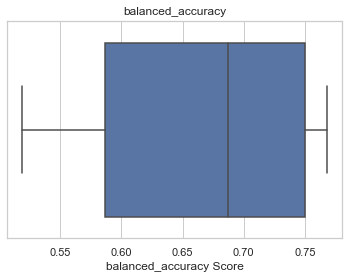

balanced_accuracy all:  [0.7678571428571428, 0.5192307692307692, 0.5865384615384616, 0.6875, 0.75]
balanced_accuracy mean:  0.6622252747252747


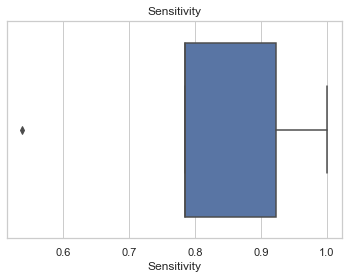

Sensitivity all:  [0.7857142857142857, 0.5384615384615384, 0.9230769230769231, 1.0, 0.7857142857142857]
Sensitivity mean:  0.8065934065934066


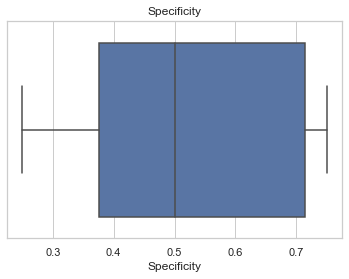

Specificity all:  [0.75, 0.5, 0.25, 0.375, 0.7142857142857143]
Specificity mean:  0.5178571428571429
One Combined Confusion Matrix
conf_matrix: 
  [[54 13]
 [19 20]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.74      0.81      0.77        67
         1.0       0.61      0.51      0.56        39

    accuracy                           0.70       106
   macro avg       0.67      0.66      0.66       106
weighted avg       0.69      0.70      0.69       106

matthews_corrcoef
0.3320143819421942
balanced_accuracy_score
0.6593953310371221
Sensitivity
0.8059701492537313
Specificity
0.5128205128205128
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7321086873325678


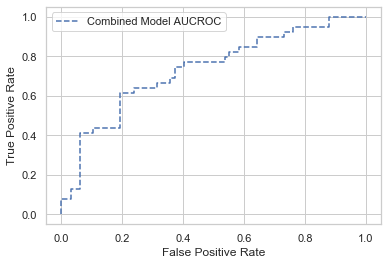

Start
0.0    70
1.0    36
Name: BSK_CASM3C_Proliferation_down, dtype: int64


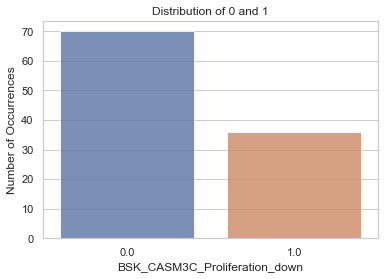

Total Compounds in Assay:  106
106
106
Total Selected CP features:  97
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 5  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      0.93      0.81        14
         1.0       0.75      0.38      0.50         8

    accuracy                           0.73        22
   macro avg       0.74      0.65      0.66        22
weighted avg       0.73      0.73      0.70        22

Total Selected CP features:  112
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        14
         1.0       1.00      0.43      0.60         7

    accuracy                           0.81        21
   macro avg       0.89      0.71      0.74        21
weighted avg       0.85      0.81      0.78        21

Total Selected CP features:  180
Total Selected train: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   40.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.70      1.00      0.82        14
         1.0       1.00      0.14      0.25         7

    accuracy                           0.71        21
   macro avg       0.85      0.57      0.54        21
weighted avg       0.80      0.71      0.63        21

Total Selected CP features:  184
Total Selected train:  85


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 6]
 [4 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.57      0.62        14
         1.0       0.33      0.43      0.38         7

    accuracy                           0.52        21
   macro avg       0.50      0.50      0.50        21
weighted avg       0.56      0.52      0.54        21

Total Selected CP features:  250
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.79      0.76        14
         1.0       0.50      0.43      0.46         7

    accuracy                           0.67        21
   macro avg       0.62      0.61      0.61        21
weighted avg       0.66      0.67      0.66        21



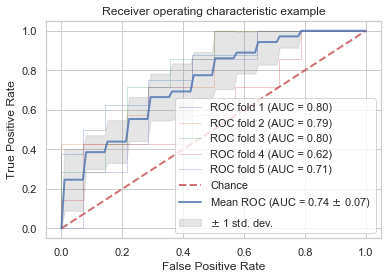

Mean of Each fold


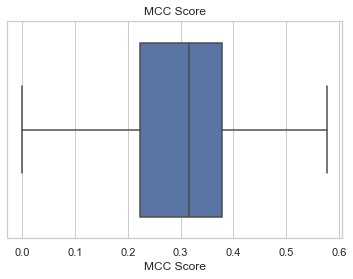

Matthews_corrcoef all:  [0.3786200927092679, 0.5773502691896257, 0.31622776601683794, 0.0, 0.22360679774997896]
Matthews_corrcoef mean:  0.2991609851331421


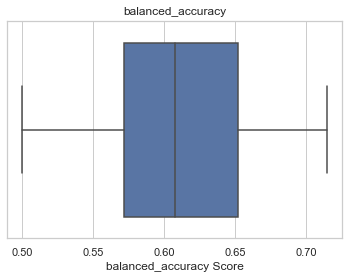

balanced_accuracy all:  [0.6517857142857143, 0.7142857142857143, 0.5714285714285714, 0.5, 0.6071428571428571]
balanced_accuracy mean:  0.6089285714285715


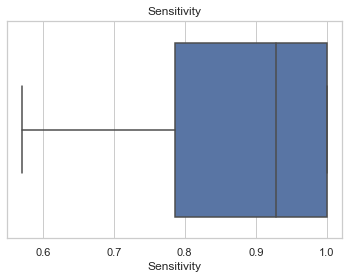

Sensitivity all:  [0.9285714285714286, 1.0, 1.0, 0.5714285714285714, 0.7857142857142857]
Sensitivity mean:  0.8571428571428571


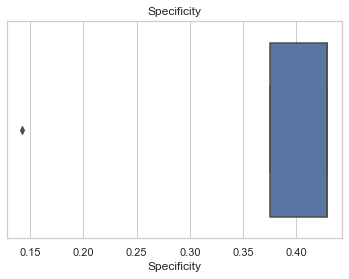

Specificity all:  [0.375, 0.42857142857142855, 0.14285714285714285, 0.42857142857142855, 0.42857142857142855]
Specificity mean:  0.3607142857142857
One Combined Confusion Matrix
conf_matrix: 
  [[60 10]
 [23 13]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      0.86      0.78        70
         1.0       0.57      0.36      0.44        36

    accuracy                           0.69       106
   macro avg       0.64      0.61      0.61       106
weighted avg       0.67      0.69      0.67       106

matthews_corrcoef
0.250760689261769
balanced_accuracy_score
0.6091269841269841
Sensitivity
0.8571428571428571
Specificity
0.3611111111111111
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7357142857142858


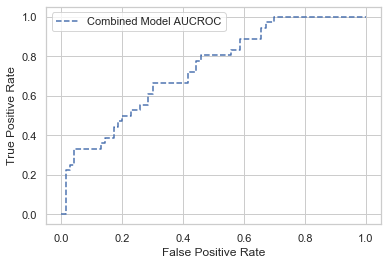

Start
0.0    70
1.0    36
Name: BSK_SAg_SRB_down, dtype: int64


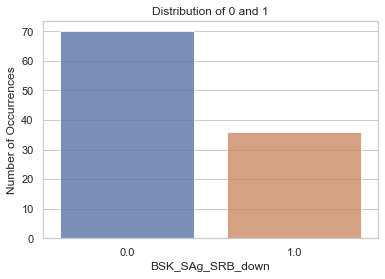

Total Compounds in Assay:  106
106
106
Total Selected CP features:  38
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 2  6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.85      0.79      0.81        14
         1.0       0.67      0.75      0.71         8

    accuracy                           0.77        22
   macro avg       0.76      0.77      0.76        22
weighted avg       0.78      0.77      0.78        22

Total Selected CP features:  114
Total Selected train

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.86      0.77        14
         1.0       0.50      0.29      0.36         7

    accuracy                           0.67        21
   macro avg       0.60      0.57      0.57        21
weighted avg       0.64      0.67      0.64        21

Total Selected CP features:  173
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        14
         1.0       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected CP features:  93
Total Selected train:  85
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.86      0.80        14
         1.0       0.60      0.43      0.50         7

    accuracy                           0.71        21
   macro avg       0.68      0.64      0.65        21
weighted avg       0.70      0.71      0.70        21

Total Selected CP features:  98
Total Selected tra

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.86      0.77        14
         1.0       0.50      0.29      0.36         7

    accuracy                           0.67        21
   macro avg       0.60      0.57      0.57        21
weighted avg       0.64      0.67      0.64        21



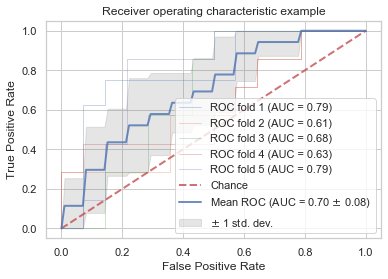

Mean of Each fold


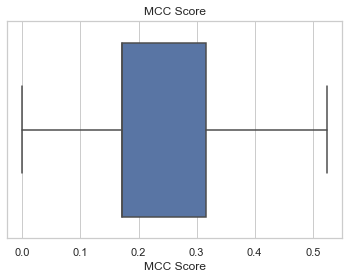

Matthews_corrcoef all:  [0.5241424183609591, 0.17149858514250885, 0.0, 0.31622776601683794, 0.17149858514250885]
Matthews_corrcoef mean:  0.23667347093256294


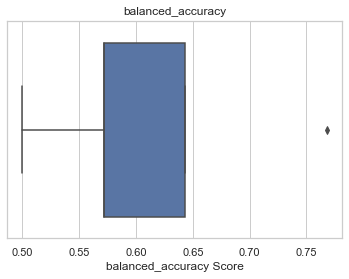

balanced_accuracy all:  [0.7678571428571428, 0.5714285714285714, 0.5, 0.6428571428571428, 0.5714285714285714]
balanced_accuracy mean:  0.6107142857142855


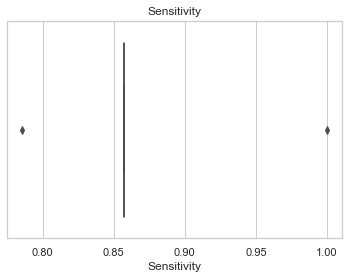

Sensitivity all:  [0.7857142857142857, 0.8571428571428571, 1.0, 0.8571428571428571, 0.8571428571428571]
Sensitivity mean:  0.8714285714285713


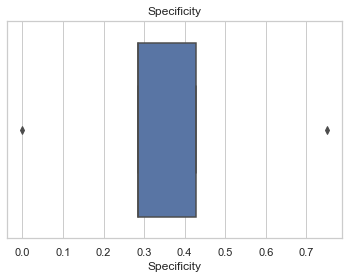

Specificity all:  [0.75, 0.2857142857142857, 0.0, 0.42857142857142855, 0.2857142857142857]
Specificity mean:  0.35
One Combined Confusion Matrix
conf_matrix: 
  [[61  9]
 [23 13]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.87      0.79        70
         1.0       0.59      0.36      0.45        36

    accuracy                           0.70       106
   macro avg       0.66      0.62      0.62       106
weighted avg       0.68      0.70      0.68       106

matthews_corrcoef
0.2715478459991979
balanced_accuracy_score
0.6162698412698413
Sensitivity
0.8714285714285714
Specificity
0.3611111111111111
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6821428571428572


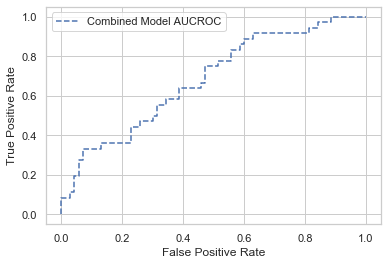

Start
0.0    72
1.0    34
Name: BSK_4H_SRB_down, dtype: int64


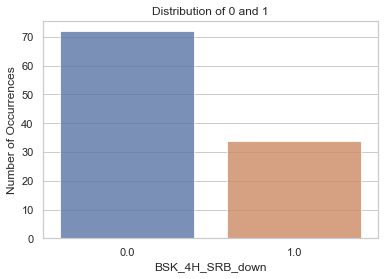

Total Compounds in Assay:  106
106
106
Total Selected CP features:  182
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   40.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  1]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        15
         1.0       0.80      0.57      0.67         7

    accuracy                           0.82        22
   macro avg       0.81      0.75      0.77        22
weighted avg       0.82      0.82      0.81        22

Total Selected CP features:  256
Total Selected train:  85


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        14
         1.0       1.00      0.43      0.60         7

    accuracy                           0.81        21
   macro avg       0.89      0.71      0.74        21
weighted avg       0.85      0.81      0.78        21

Total Selected CP features:  421
Total Selected train:  85

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   41.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.79      0.71        14
         1.0       0.25      0.14      0.18         7

    accuracy                           0.57        21
   macro avg       0.45      0.46      0.45        21
weighted avg       0.51      0.57      0.53        21

Total Selected CP features:  114
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   41.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.7min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 2  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        14
         1.0       1.00      0.71      0.83         7

    accuracy                           0.90        21
   macro avg       0.94      0.86      0.88        21
weighted avg       0.92      0.90      0.90        21

Total Selected CP features:  258
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.4min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  1]
 [ 4  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        15
         1.0       0.67      0.33      0.44         6

    accuracy                           0.76        21
   macro avg       0.72      0.63      0.65        21
weighted avg       0.75      0.76      0.73        21



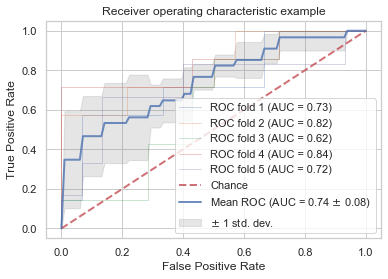

Mean of Each fold


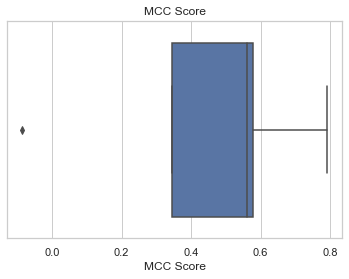

Matthews_corrcoef all:  [0.561011491466461, 0.5773502691896257, -0.08574929257125442, 0.7905694150420949, 0.3442651863295482]
Matthews_corrcoef mean:  0.4374894138912951


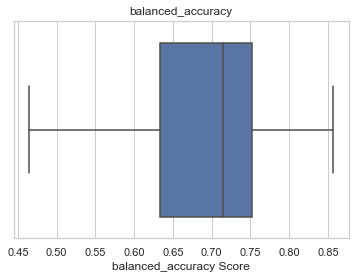

balanced_accuracy all:  [0.7523809523809524, 0.7142857142857143, 0.4642857142857143, 0.8571428571428572, 0.6333333333333333]
balanced_accuracy mean:  0.6842857142857144


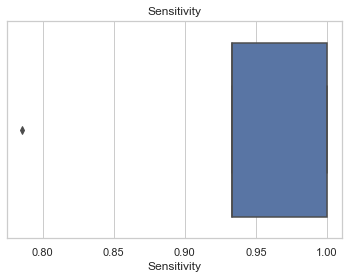

Sensitivity all:  [0.9333333333333333, 1.0, 0.7857142857142857, 1.0, 0.9333333333333333]
Sensitivity mean:  0.9304761904761906


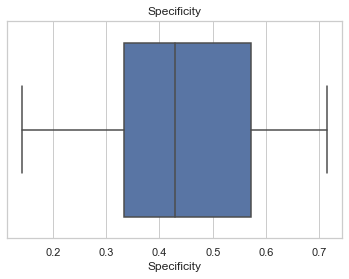

Specificity all:  [0.5714285714285714, 0.42857142857142855, 0.14285714285714285, 0.7142857142857143, 0.3333333333333333]
Specificity mean:  0.43809523809523815
One Combined Confusion Matrix
conf_matrix: 
  [[67  5]
 [19 15]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        72
         1.0       0.75      0.44      0.56        34

    accuracy                           0.77       106
   macro avg       0.76      0.69      0.70       106
weighted avg       0.77      0.77      0.75       106

matthews_corrcoef
0.4434773687828806
balanced_accuracy_score
0.6858660130718954
Sensitivity
0.9305555555555556
Specificity
0.4411764705882353
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7438725490196079


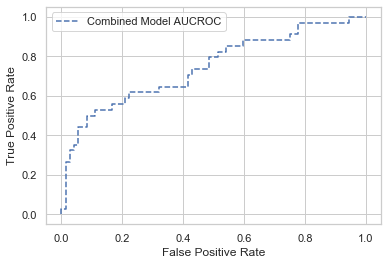

Start
0.0    90
1.0    34
Name: ACEA_T47D_80hr_Negative, dtype: int64


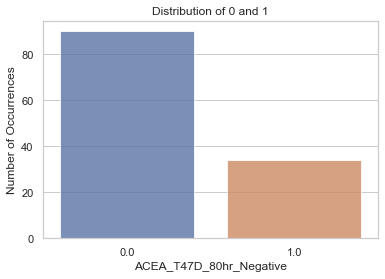

Total Compounds in Assay:  124
124
124
Total Selected CP features:  305
Total Selected train:  99
Total Selected test:  25
Fitting 4 folds for each of 768 candidates, totalling 3072 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   25.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   50.1s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  4.3min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  1]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.74      0.94      0.83        18
         1.0       0.50      0.14      0.22         7

    accuracy                           0.72        25
   macro avg       0.62      0.54      0.53        25
weighted avg       0.67      0.72      0.66        25

Total Selected CP features:  176
Total Selected trai

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   24.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   47.2s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  4.3min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  1]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        18
         1.0       0.75      0.43      0.55         7

    accuracy                           0.80        25
   macro avg       0.78      0.69      0.71        25
weighted avg       0.79      0.80      0.78        25

Total Selected CP features:  194
Total Selected train:  99

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   19.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   38.8s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  4.2min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[18  0]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        18
         1.0       1.00      0.29      0.44         7

    accuracy                           0.80        25
   macro avg       0.89      0.64      0.66        25
weighted avg       0.84      0.80      0.76        25

Total Selected CP features:  127
Total Selected train: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   25.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   49.0s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  3.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  1]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.77      0.94      0.85        18
         1.0       0.67      0.29      0.40         7

    accuracy                           0.76        25
   macro avg       0.72      0.62      0.62        25
weighted avg       0.74      0.76      0.72        25

Total Selected CP features:  266
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    6.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   18.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   34.8s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   57.6s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  3.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  1]
 [ 4  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        18
         1.0       0.67      0.33      0.44         6

    accuracy                           0.79        24
   macro avg       0.74      0.64      0.66        24
weighted avg       0.77      0.79      0.76        24



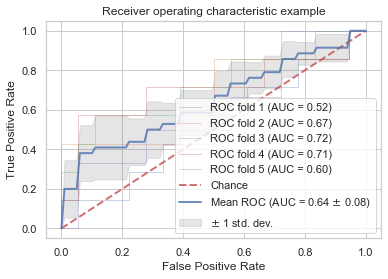

Mean of Each fold


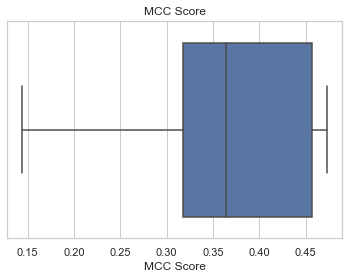

Matthews_corrcoef all:  [0.1444869078105018, 0.45684927742384673, 0.4728662437434604, 0.3180099858972217, 0.363696483726654]
Matthews_corrcoef mean:  0.3511817797203369


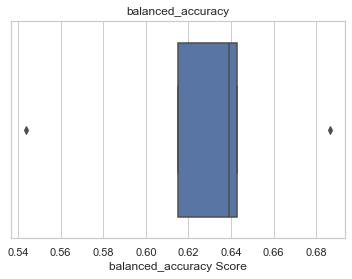

balanced_accuracy all:  [0.5436507936507936, 0.6865079365079365, 0.6428571428571428, 0.6150793650793651, 0.6388888888888888]
balanced_accuracy mean:  0.6253968253968254


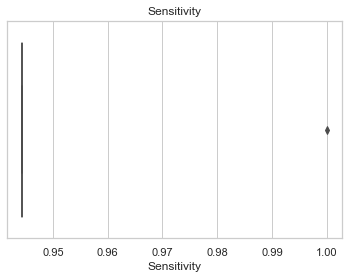

Sensitivity all:  [0.9444444444444444, 0.9444444444444444, 1.0, 0.9444444444444444, 0.9444444444444444]
Sensitivity mean:  0.9555555555555555


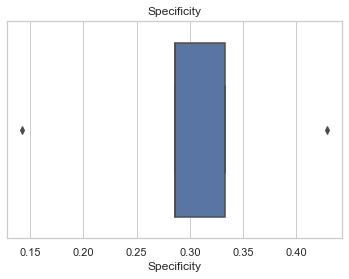

Specificity all:  [0.14285714285714285, 0.42857142857142855, 0.2857142857142857, 0.2857142857142857, 0.3333333333333333]
Specificity mean:  0.2952380952380952
One Combined Confusion Matrix
conf_matrix: 
  [[86  4]
 [24 10]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      0.96      0.86        90
         1.0       0.71      0.29      0.42        34

    accuracy                           0.77       124
   macro avg       0.75      0.62      0.64       124
weighted avg       0.76      0.77      0.74       124

matthews_corrcoef
0.35194296209717124
balanced_accuracy_score
0.6248366013071895
Sensitivity
0.9555555555555556
Specificity
0.29411764705882354
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6519607843137255


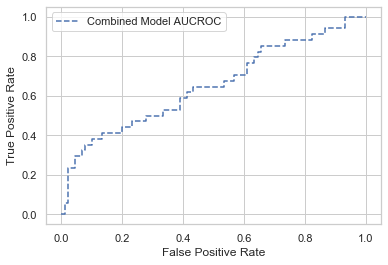

In [20]:
list_of_lists = []

for col in tox_list:
    
    method = "ErG+CP_KS_0.02"
    
    print("Start")
    toxcast_counts=our_data[col].value_counts()
    print(our_data[col].value_counts())
    pyplot.figure()
    sns.barplot(toxcast_counts.index, toxcast_counts.values, alpha=0.8)
    pyplot.title('Distribution of 0 and 1')
    pyplot.ylabel('Number of Occurrences', fontsize=12)
    pyplot.xlabel(col, fontsize=12)
    pyplot.show()
    
    if col=='ACEA_T47D_80hr_Negative':
        n_cluster=4
    else:
        n_cluster=5  
        
    
    target=col

    df_temp=pd.merge(cp, toxcast[[target, 'smiles_r']], left_on = 'smiles_r', right_on = 'smiles_r', how = 'inner')
    df_temp['ErGFingerprint'] =df_temp['smiles_r'].apply(ErGFingerprint)
    df_temp=df_temp.dropna(subset=[target])
    df_temp=df_temp.drop('Unnamed: 0', axis = 1)
    
    
    X_erg = np.array([x for x in df_temp['ErGFingerprint']])
    
    
    data=df_temp 
    data=data.drop('ErGFingerprint', axis = 1)
    data=data.drop('smiles_r', axis = 1)
    

    
    X_CP, y = data.loc[:, data.columns != target], data[target]

    X_CP=X_CP.to_numpy()
    
    y=y.to_numpy()
        
    print("Total Compounds in Assay: ", len(y))
    X= np.concatenate((X_CP, X_erg ), axis=1)
    
    print(len(X))
    print(len(y))
    
    outercv = StratifiedKFold(n_splits=5,shuffle=True, random_state=0)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    
    mat_cof=[]
    ba=[]
    sen=[]
    spe=[]
    combined_y_test=[]
    combined_y_pred=[]
    
    for i, (train_index, test_index) in enumerate(outercv.split(X, y)):
        
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train_erg=X_train[:, 1766:]
        X_test_erg=X_test[:, 1766:]
        
        rows_train_CP= np.concatenate((X_train[:, :1766], y_train[:,None]),axis=1)
        new_df_train_CP = pd.DataFrame(rows_train_CP, columns=data.columns)
        
        rows_test_CP= np.concatenate((X_test[:, :1766], y_test[:,None]),axis=1)
        new_df_test_CP = pd.DataFrame(rows_test_CP, columns=data.columns)
        
        arr=[]
        col_list=[]

        for num in new_df_train_CP.columns:
        
            inactives=new_df_train_CP[num][new_df_train_CP[target]==0]
            actives=new_df_train_CP[num][new_df_train_CP[target]==1]
       
            if (ks_2samp(inactives, actives)[1] <= 0.02):
                col_list.append(num)
        
        print("Total Selected CP features: ",  len(col_list))
        

        train_data_CP=new_df_train_CP[col_list]
        test_data_CP=new_df_test_CP[col_list]
    
        X_train_CP= train_data_CP.loc[:, train_data_CP.columns != target]
        X_train_CP=X_train_CP.to_numpy()
        
        X_test_CP= test_data_CP.loc[:, test_data_CP.columns != target]
        X_test_CP=X_test_CP.to_numpy()
        
        X_train= np.concatenate((X_train_CP, X_train_erg ), axis=1)
        X_test= np.concatenate((X_test_CP, X_test_erg ), axis=1)
        
        print("Total Selected train: ",  len(X_train))
        print("Total Selected test: ",  len(X_test))
        
        inner_cv = StratifiedKFold(n_splits=n_cluster, shuffle=True, random_state=0)
               
        param_grid = { 
        'max_depth': [15, 10, 20],
        'max_features': ['auto'],
        'min_samples_leaf': [3, 6, 12, 15],
        'min_samples_split': [6, 9, 12, 15],
        'n_estimators':[100, 200, 300, 700],
        'bootstrap': [False],
        'oob_score': [False],
        'random_state': [0],
        'criterion': ['gini', 'entropy'],
        'n_jobs': [-1],
        'class_weight' : [None, 'balanced']
        }
        
        # Create a based model
        rf = RandomForestClassifier()
        # Instantiate the grid search model
        grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                  cv = inner_cv, n_jobs =40, verbose = 2)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)
        print(grid_search.best_estimator_)

        classifier = grid_search.best_estimator_
        
        
        
        classifier.fit(X_train, y_train)
       
        y_pred = classifier.predict(X_test)
        y_proba = classifier.predict_proba(X_test)
       
        combined_y_test=np.concatenate((combined_y_test, y_test), axis=None)
        combined_y_pred=np.concatenate((combined_y_pred, y_pred), axis=None)
        
        if i==0:
            combined_y_proba=y_proba
        else:
            combined_y_proba=np.concatenate((combined_y_proba, y_proba), axis=0)
    
    
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("In this fold")
        print("conf_matrix: \n " , conf_matrix)
        print("classification_report: \n",classification_report(y_test, y_pred))
    
        mat_cof.append(matthews_corrcoef(y_test, y_pred))
        ba.append(balanced_accuracy_score(y_test, y_pred))
        
        sen.append(conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1]))
        spe.append(conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))

        
        viz = plot_roc_curve(classifier, X_test, y_test,
                             name='ROC fold {}'.format(1+i),
                             alpha=0.3, lw=1, ax=ax)
        
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    
    print("Mean of Each fold")
       
    sns.set(style="whitegrid")    
    sns.boxplot(x=mat_cof).set(title = 'MCC Score', xlabel = 'MCC Score' )
    plt.show()
    print("Matthews_corrcoef all: ",(mat_cof))
    print("Matthews_corrcoef mean: ", np.mean(mat_cof))
    
    sns.boxplot(x=ba).set(title = 'balanced_accuracy', xlabel = 'balanced_accuracy Score' )
    plt.show() 
    print("balanced_accuracy all: ",(ba))
    print("balanced_accuracy mean: ", np.mean(ba))
        
    sns.boxplot(x=sen).set(title = 'Sensitivity', xlabel = 'Sensitivity' )
    plt.show()
    print("Sensitivity all: ",(sen))
    print("Sensitivity mean: ", np.mean(sen))
        
    sns.boxplot(x=spe).set(title = 'Specificity', xlabel = 'Specificity' )
    plt.show()
    print("Specificity all: ",(spe))
    print("Specificity mean: ", np.mean(spe))
    
    
    
    print("One Combined Confusion Matrix")
    combined_conf_matrix = confusion_matrix(combined_y_test, combined_y_pred)
    print("conf_matrix: \n " , combined_conf_matrix)
    print("classification_report: \n",classification_report(combined_y_test, combined_y_pred))
    
    print('matthews_corrcoef')
    mcc= matthews_corrcoef(combined_y_test, combined_y_pred)
    print(mcc)

    
    print('balanced_accuracy_score')
    ba= balanced_accuracy_score(combined_y_test, combined_y_pred)
    print(ba)
    
    
    print('Sensitivity')   
    sen=combined_conf_matrix[0,0]/(combined_conf_matrix[0,0]+combined_conf_matrix[0,1])
    print(sen)
    
    print('Specificity')  
    spe=combined_conf_matrix[1,1]/(combined_conf_matrix[1,0]+combined_conf_matrix[1,1])
    print(spe)
       
    print("AUC-ROC for the combined results: ")
    probs_combined_model= combined_y_proba[:,1]
    roc_value_combined_model= roc_auc_score(combined_y_test, probs_combined_model) 
    print("Combined Model AUC ROC: ", roc_value_combined_model)
    
    base_model_fpr, base_model_tpr, _ = roc_curve(combined_y_test, probs_combined_model)
    plt.plot(base_model_fpr, base_model_tpr, linestyle='--', label='Combined Model AUCROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    row=[col, method, sen, spe, ba, mcc, roc_value_combined_model]
    list_of_lists.append(row)

In [21]:
df=pd.DataFrame(list_of_lists,columns=["target", "method", "sen", "spe", "ba", "mcc", "auc_roc"])
df

,target,method,sen,spe,ba,mcc,auc_roc
0,BSK_hDFCGF_Proliferation_down,ErG+CP_KS_0.02,0.640000,0.571429,0.605714,0.211429,0.681429
1,APR_HepG2_CellLoss_72h_dn,ErG+CP_KS_0.02,0.790698,0.488889,0.639793,0.292576,0.706460
2,BSK_3C_Proliferation_down,ErG+CP_KS_0.02,0.788462,0.666667,0.727564,0.457991,0.786325
3,BSK_SAg_Proliferation_down,ErG+CP_KS_0.02,0.741379,0.458333,0.599856,0.208552,0.631466
4,BSK_3C_SRB_down,ErG+CP_KS_0.02,0.754098,0.422222,0.588160,0.186710,0.628415
5,BSK_3C_Vis_down,ErG+CP_KS_0.02,0.846154,0.439024,0.642589,0.315020,0.708068
6,APR_HepG2_CellLoss_24h_dn,ErG+CP_KS_0.02,0.909091,0.393939,0.651515,0.363696,0.723967
7,BSK_LPS_SRB_down,ErG+CP_KS_0.02,0.805970,0.512821,0.659395,0.332014,0.732109
8,BSK_CASM3C_Proliferation_down,ErG+CP_KS_0.02,0.857143,0.361111,0.609127,0.250761,0.735714
9,BSK_SAg_SRB_down,ErG+CP_KS_0.02,0.871429,0.361111,0.616270,0.271548,0.682143


In [22]:
file_name="Metrics_KFold_Aggregated"+method+".csv"
df.to_csv(file_name)